In [1]:
import torch
import numpy as np
import models,utils,camera
import matplotlib.pyplot as plt
from tqdm import tqdm
import datasets
import matplotlib.pyplot as plt
from camera import Camera_v2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset = datasets.GSO(r"C:\Users\Admin\Documents\Dataset\GSO_image")
cam  = Camera_v2(35,35,32,32)


BATCH_SIZE = 16
LEARNING_RATE = 0.0001
EPOCH = 300

c:\Users\Admin\anaconda3\envs\torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = models.MultiViewModel().to(device)
model = torch.load('best.pth').to(device)

In [3]:
loader = torch.utils.data.DataLoader(dataset,
                                    batch_size=BATCH_SIZE, shuffle=True,
                                    num_workers=4,drop_last = True)


optimizer = torch.optim.AdamW(list(model.parameters()),lr=LEARNING_RATE)
loss = torch.nn.MSELoss(reduce="mean")



c:\Users\Admin\anaconda3\envs\torch\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [4]:
model.train()
for epoch in range(EPOCH):
    mean = 0
    train_loop = tqdm(loader)
    for i,batch in enumerate(train_loop):
        X=batch['X'].to(device)
        Y = batch['Y'].to(device)
        relative_M = batch['relative_M'].to(device)
        output = model(X,relative_M)
        #l = loss(output,batch['Y'].to(device))
        l = (output[:,:3]-Y[:,:3])**2*Y[:,-1:]
        l = l.mean() + ((output[:,-1]-Y[:,-1])**2).mean()
        mean += float(l)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        train_loop.set_description(f"training {epoch+1}/{EPOCH}")
        train_loop.set_postfix(loss_task = float(l),tot_loss=mean/(i+1)/0.004)

  0%|          | 0/64 [02:51<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
torch.save(model,'best.pth')

In [ ]:
for batch_test in loader:
    break

In [ ]:
batch_test['X'].shape

torch.Size([16, 4, 512, 512])

In [ ]:
#X = torch.concat([torch.ones(1,4,512,512),torch.zeros(15,4,512,512)],0).to(device)
model.eval()
with torch.no_grad():
    X = batch_test['X'].to(device)
    Y = batch_test['Y'].to(device)
    relative_M = batch_test['relative_M'].to(device)
    #relative_M[...,-1,-1] = 2
    print(relative_M[0])
    Y_model = model(X,relative_M)


tensor([[ 1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-1.8626e-08,  1.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00]], device='cuda:0')


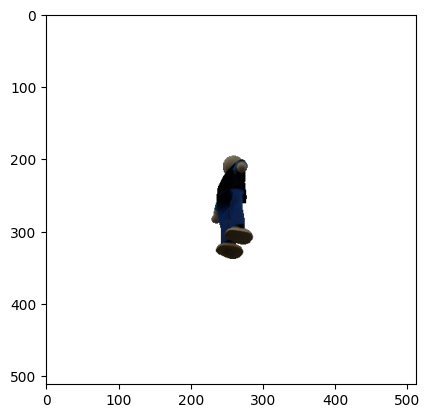

In [ ]:
i = 2
plt.imshow(X[i].detach().cpu().permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


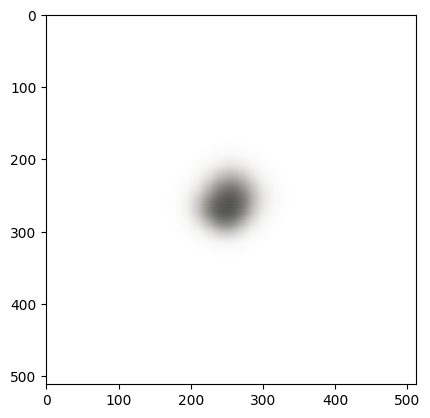

In [ ]:
plt.imshow((Y_model[i]).detach().cpu().permute(1,2,0))

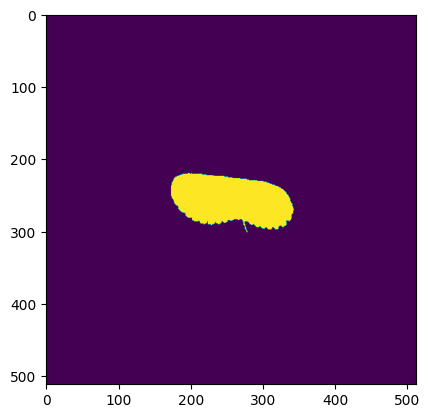

In [ ]:
plt.imshow(Y[i].detach().cpu().permute(1,2,0)[...,-1])

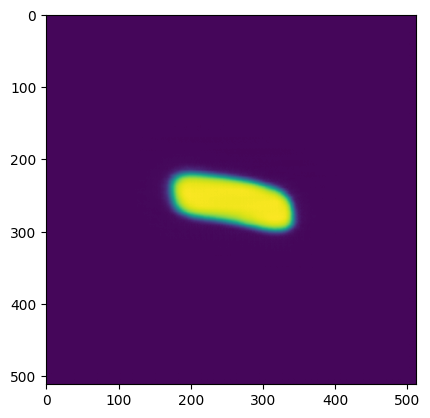

In [ ]:
plt.imshow(Y_model[i].detach().cpu().permute(1,2,0)[...,-1])


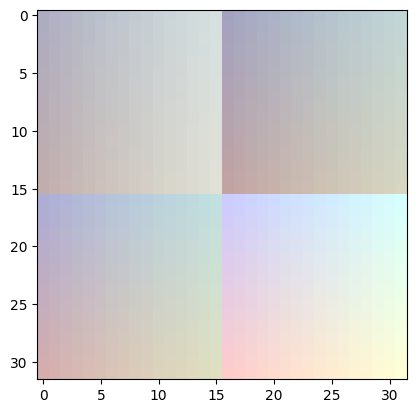

In [ ]:
import models
import torch
import numpy as np
import matplotlib.pyplot as plt
grid = models.build_grid((16,16))
info  = torch.FloatTensor([[1.,2.],[3.,4.]]).unsqueeze(-1)
result = grid.reshape(1,16,1,16,4) + info.reshape(2,1,2,1,1)
result = result.reshape(32,32,4)/5
plt.imshow(result)